Employee Turnover Analytics.
Course-end Project 4
Description

Project Statement: 

Portobello Tech is an app innovator that has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details including the number of projects they worked upon, average monthly working hours, time spent in the company, promotions in the last 5 years, and salary level. 

Data from prior evaluations show the employee’s satisfaction at the workplace. The data could be used to identify patterns in work style and their interest to continue to work in the company.  

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over a certain time period. 

As the ML Developer assigned to the HR Department, you have been asked to create ML Programs to 

Perform data quality check by checking for missing values if any. 

Understand what factors contributed most to employee turnover by EDA. 

Perform clustering of Employees who left based on their satisfaction and evaluation. 

Handle the left Class Imbalance using SMOTE technique. 

Perform k-fold cross-validation model training and evaluate performance.  

Identify the best model and justify the evaluation metrics used.  

Suggest various retention strategies for targeted employees. 


Perform the following steps:
1.	Perform data quality check by checking for missing values if any.

In [1652]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_file = 'Data////1673873196_hr_comma_sep.xlsx'
dataset = pd.read_excel(data_file)

In [1653]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [1654]:
dataset.shape

(14999, 10)

In [1655]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [1656]:
# Check null values
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [1657]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

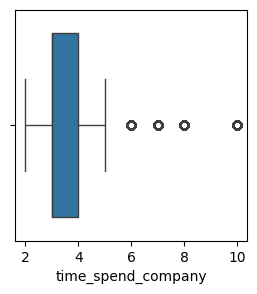

In [1658]:
# Check outliers
plt.figure(figsize=(3,3))
sns.boxplot(x=dataset['time_spend_company'])
plt.show()

In [1659]:
# Only for time_spend_company columns, there is outliers. 
# Impute them with maximum hours calulated with excluding outlier values.

replace_val = dataset[dataset.loc[:, 'time_spend_company'] >= 6]['time_spend_company']
max_val = dataset[~(dataset.loc[:, 'time_spend_company'] >= 6)]['time_spend_company'].max()
dataset['time_spend_company'].replace(to_replace=replace_val.to_list(), value=max_val, inplace=True)

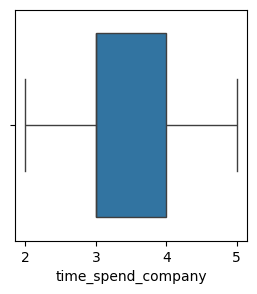

In [1660]:
plt.figure(figsize=(3,3))
sns.boxplot(x=dataset['time_spend_company'])
plt.show()

In [1661]:
replace_val = dataset[dataset.loc[:, 'time_spend_company'] >= 6]['time_spend_company']
replace_val

Series([], Name: time_spend_company, dtype: int64)

In [1662]:
# check categorical and continuous variables
continuous_var=[]
categorical_var=[]

for i in dataset.columns :
    if dataset[i].value_counts().size < 10 :
        categorical_var.append(i)
    else :
        continuous_var.append(i)

In [1663]:
print("Continuous:", continuous_var)
print("Categorical:", categorical_var)

Continuous: ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'sales']
Categorical: ['number_project', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'salary']


2.	Understand what factors contributed most to employee turnover by EDA.

2.1.	Draw a heatmap of the Correlation Matrix between all numerical features/columns in the data.

In [1664]:
dataset['numeric_salary'] = 0
dataset.loc[dataset[dataset.salary == 'low'].index, 'numeric_salary'] = 0
dataset.loc[dataset[dataset.salary == 'medium'].index, 'numeric_salary'] = 1
dataset.loc[dataset[dataset.salary == 'high'].index, 'numeric_salary'] = 2

In [1665]:
dataset[['salary', 'numeric_salary']].head()

,salary,numeric_salary
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0


In [1666]:
dataset[dataset['salary'] == 'high'][['salary', 'numeric_salary']].head()

,salary,numeric_salary
72,high,2
111,high,2
189,high,2
267,high,2
306,high,2


In [1667]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'numeric_salary'],
      dtype='object')

<Axes: >

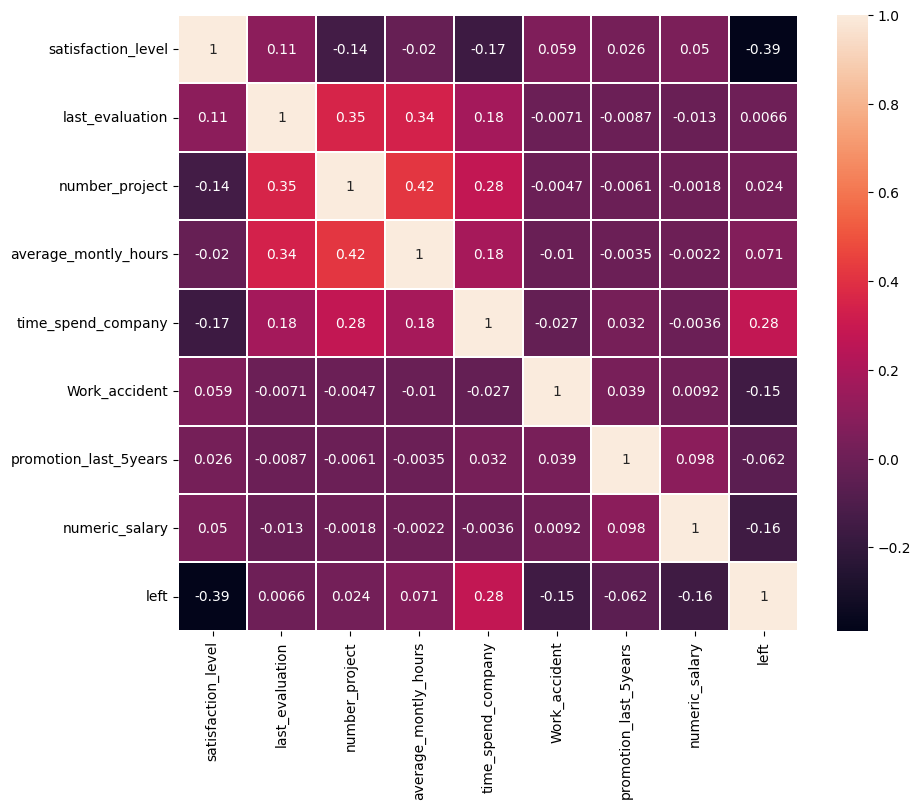

In [1668]:
display_columns=['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'numeric_salary', 'left']
plt.figure(figsize=(10,8))
sns.heatmap(dataset[display_columns].corr(), annot=True, linewidth=0.1)

In [1669]:
dataset[display_columns].corr()['left'].sort_values(ascending = False)

left                     1.000000
time_spend_company       0.275025
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
numeric_salary          -0.157898
satisfaction_level      -0.388375
Name: left, dtype: float64

left and satisfaction_level has the strongest negative relationship

In [1670]:
dataset.drop('numeric_salary', axis=1, inplace=True)

2.2.	Draw the distribution plot of 

■	Employee Satisfaction (use column satisfaction_level)

■	Employee Evaluation (use column last_evaluation)

■	Employee Average Monthly Hours (use column average_montly_hours)

<Figure size 700x500 with 0 Axes>

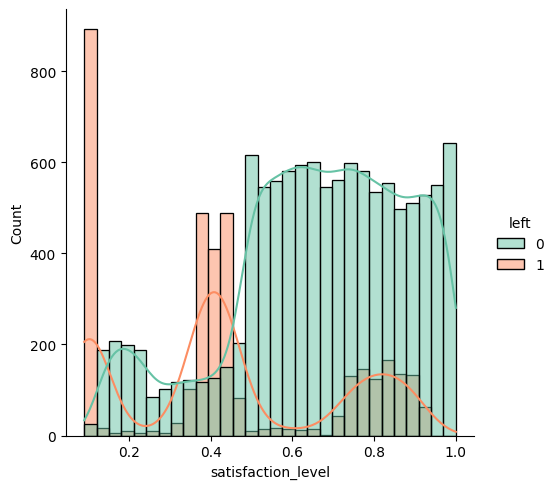

In [1671]:
plt.figure(figsize=(7,5))
sns.displot(data=dataset, x='satisfaction_level', hue='left', kde=True, palette='Set2')
#plt.title(label="Employ Satisfaction")
plt.show()

In [1672]:
dataset['satisfaction_level'].min()

0.09

<Figure size 700x500 with 0 Axes>

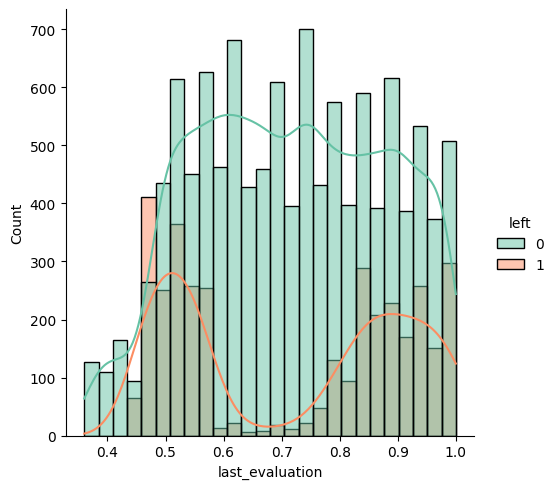

In [1673]:
plt.figure(figsize=(7,5))
sns.displot(data=dataset, x='last_evaluation', hue='left', kde=True, palette='Set2')
#plt.title(label="Employ Evaluation")
plt.show()

<Figure size 700x500 with 0 Axes>

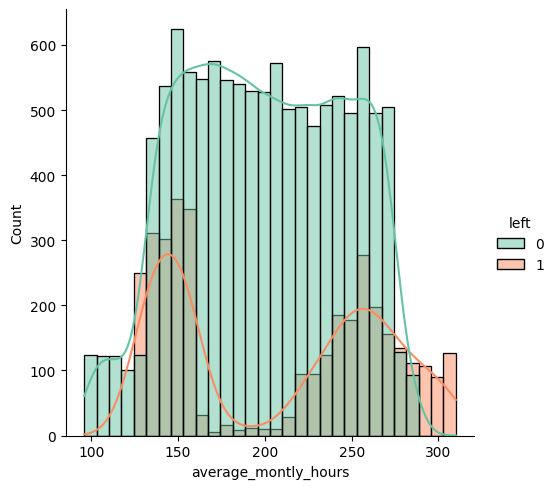

In [1674]:
plt.figure(figsize=(7,5))
sns.displot(data=dataset, x='average_montly_hours', hue='left', kde=True, palette='Set2')
#plt.title(label="Employ Average Montly Hours")
plt.show()

2.3.	Draw the bar plot of Employee Project Count of both employees who left and who stayed in the organization (use column number_project and hue column left)  and give your inferences from the plot.

<Figure size 400x400 with 0 Axes>

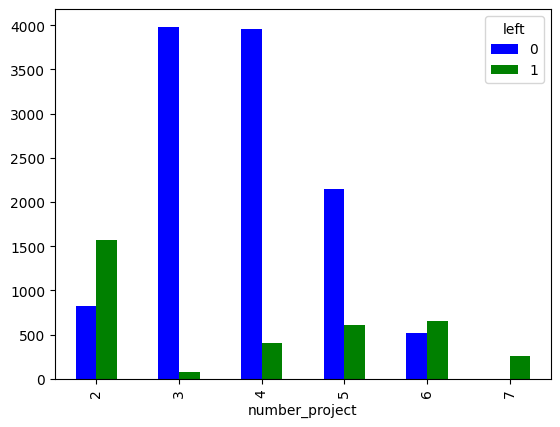

In [1675]:
plt.figure(figsize=(4,4))
pd.crosstab(dataset['number_project'], dataset['left']).plot(kind='bar', color=['blue', 'green'])
plt.show()

In [1676]:
dataset['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [1677]:
dataset['left'].shape[0]

14999

In [1678]:
round(dataset['left'].value_counts()[1] / dataset['left'].shape[0] * 100, 2)

23.81

24.51% employees left the company and others stayed. Number of project and average monthly hours are related strongly with the last_evaluation with the correlation value 0.35 and 0.34. So if we use last_evaluation to build the model, it makes sense.

3.	Perform clustering of Employees who left based on their satisfaction and evaluation.

3.1.	Choose columns satisfaction_level, last_evaluation and left.

In [1679]:
X = dataset[['satisfaction_level', 'last_evaluation', 'left']].values
X.shape

(14999, 3)

3.2.	Do KMeans clustering of employees who left the company into 3 clusters.

In [1680]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=7)
y_kmeans = kmeans.fit_predict(X)

In [1681]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [1682]:
dataset['cluster'] = y_kmeans

In [1683]:
for i in range(0,3) :
    print(dataset.loc[dataset.cluster == i, ['satisfaction_level', 'last_evaluation', 'left', 'cluster']].describe())
    print(dataset.loc[dataset.cluster == i, 'left'].value_counts())

       satisfaction_level  last_evaluation    left  cluster
count         3571.000000      3571.000000  3571.0   3571.0
mean             0.440098         0.718113     1.0      0.0
std              0.263933         0.197673     0.0      0.0
min              0.090000         0.450000     1.0      0.0
25%              0.130000         0.520000     1.0      0.0
50%              0.410000         0.790000     1.0      0.0
75%              0.730000         0.900000     1.0      0.0
max              0.920000         1.000000     1.0      0.0
left
1    3571
Name: count, dtype: int64
       satisfaction_level  last_evaluation    left  cluster
count         6740.000000      6740.000000  6740.0   6740.0
mean             0.812500         0.740128     0.0      1.0
std              0.108591         0.154948     0.0      0.0
min              0.590000         0.360000     0.0      1.0
25%              0.720000         0.610000     0.0      1.0
50%              0.810000         0.740000     0.0      1.0

cluster 0 : High Risk : satisfaction_level:lowest, upper 50% pepople's last_evaluation is higer than clust 2, 
            
            These employee evaluated their company relatively high, but satisfied low, left the company
            
cluster 1 : Medium Risk : satisfaction_level:medium low, last_evaluation low.

            These employee are not very satisfied at work, evaluated low, but did not left the company
                        
cluster 2 : Low Risk : satisfaction_level:highest, last_evaluation is high

            They are satisfied wit their company and evaluated high, stay.

The statistics is a little mixed and doesn't look perfect.

4.	Handle the left Class Imbalance using SMOTE technique.
   
4.1.	Pre-Process the data by converting categorical columns to numerical columns by

■	Separating categorical variables and numeric variables.

■	Applying get_dummies() to the categorical variables.

■	Combining categorical variables and numeric variables.

In [1684]:
# seperate categorical and continuous variables
continuous_var=[]
categorical_var=[]

for i in dataset.columns :
    if dataset[i].value_counts().size < 10 :
        categorical_var.append(i)
    else :
        continuous_var.append(i)

In [1685]:
categorical_var

['number_project',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'salary',
 'cluster']

In [1686]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  cluster                14999 non-null  int32  
dtypes: float64(2), int32(1), int64(6), object(2)
memory usage: 1.2+ MB


Above values are categorical but except for sales and salary, all variables are already numeric
So, apply get_dummies() to sales and salary

In [1687]:
d_dataset = pd.get_dummies(data=dataset, prefix="dummies", columns=['sales', 'salary'], dtype='int64')

In [1688]:
d_dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cluster', 'dummies_IT', 'dummies_RandD',
       'dummies_accounting', 'dummies_hr', 'dummies_management',
       'dummies_marketing', 'dummies_product_mng', 'dummies_sales',
       'dummies_support', 'dummies_technical', 'dummies_high', 'dummies_low',
       'dummies_medium'],
      dtype='object')

4.2.	Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [1689]:
import warnings
warnings.filterwarnings('ignore')

X = d_dataset.drop(['cluster', 'left'], axis=1).values
y = d_dataset['left'].values
print(X.shape, y.shape)

(14999, 20) (14999,)


In [1690]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

In [1691]:
sss.get_n_splits(X, y)

1

In [1692]:
sss

StratifiedShuffleSplit(n_splits=1, random_state=123, test_size=0.2,
            train_size=None)

In [1693]:
for i, (train_index, test_index) in enumerate(sss.split(X, y)) :
    print(f"Fold {i}")
    print(f"   Train: index={train_index}")
    print(f"   Test:  index={test_index}")
    print(f"   Train: size={train_index.size}")
    print(f"   Test:  size={test_index.size}")

Fold 0
   Train: index=[6197 1955 9440 ... 1574 8994 8660]
   Test:  index=[10627  2703  6059 ...  6610 10327   731]
   Train: size=11999
   Test:  size=3000


4.3.	Upsample the train dataset using SMOTE technique from the imblearn module.

In [1694]:
from collections import Counter
print(Counter(y))

Counter({0: 11428, 1: 3571})


In [1695]:
from imblearn.over_sampling import SMOTE

for i, (train_index, test_index) in enumerate(sss.split(X, y)) :
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    sm = SMOTE(random_state=123)
    X_res, y_res = sm.fit_resample(X_train, y_train)

    print('Resampled Data Shape: %s' % Counter(y_res))
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print(X_res.shape, y_res.shape)

Resampled Data Shape: Counter({0: 9142, 1: 9142})
(11999, 20) (3000, 20) (11999,) (3000,)
(18284, 20) (18284,)


5.	Perform 5-Fold cross-validation model training and evaluate performance. 

5.1.	Train a Logistic Regression model and apply a 5-Fold CV and plot the classification report


In [1696]:
# Train Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=7)
y_lr_pred = log_reg.fit(X_res, y_res).predict(X_test)

In [1697]:
print(round(log_reg.fit(X_res, y_res).score(X_test, y_test), 3))

0.795


In [1698]:
# 5-Fold cross validation
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(log_reg, X_res, y_res, cv=5)
print("{:.3f} accuracy with standard deviation is {:.3f}"
      .format(cv_score.mean(), cv_score.std()))

0.834 accuracy with standard deviation is 0.008


In [1699]:
def make_cl_report_data(y_test, y_pred) :
    
    dict_cl = classification_report(y_test, y_pred, output_dict=True)
    outer_list = []
    inner_list = []
    cl_xlabel = []
    for row in dict_cl.keys() :
        inner_list=[]    
        if (row == 'accuracy') :
            inner_list = [0] + [0] + [dict_cl[row]]
        else :
            for col in dict_cl[row].keys() :
                cl_xlabel.append(col)
                inner_list.append(dict_cl[row][col])
        outer_list.append(inner_list)
    outer_list[2].append(outer_list[3][3]) 
    cl_xlabel=cl_xlabel[:4]

    sns.heatmap(pd.DataFrame(outer_list),
                annot=True, 
                xticklabels=cl_xlabel,
                yticklabels=dict_cl.keys(), 
                linewidth = 0.4,
                cbar=True,
                vmin = 700,
                vmax = 1800,
                center = 1000,
                cmap=sns.color_palette("light:#5A9", as_cmap=True))

    return cl_content

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2286
           1       0.54      0.88      0.67       714

    accuracy                           0.80      3000
   macro avg       0.75      0.82      0.76      3000
weighted avg       0.86      0.80      0.81      3000



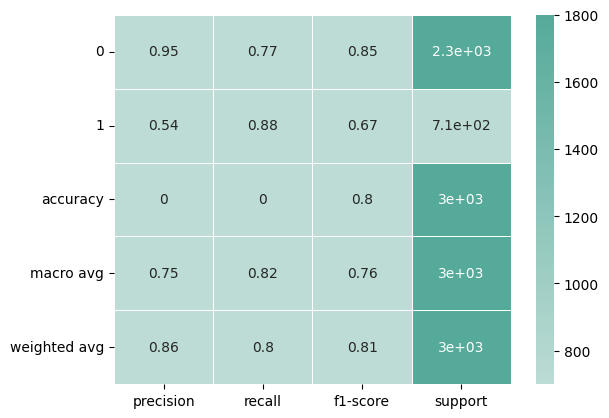

In [1700]:
# plot the classification report
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_lr_pred))
cl_content = make_cl_report_data(y_test, y_lr_pred)



5.3.	Train a Random Forest Classifier model and apply the 5-Fold CV and plot the classification report.

In [1701]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=7, max_depth=3)
rfc.fit(X_res, y_res)
y_rfc_pred = rfc.predict(X_test)

In [1702]:
cv_rfc_score = cross_val_score(rfc, X_res, y_res, cv=5)
print("{:.3f} accuracy with standard deviation is {:.3f}"
      .format(cv_rfc_score.mean(), cv_rfc_score.std()))

0.923 accuracy with standard deviation is 0.012


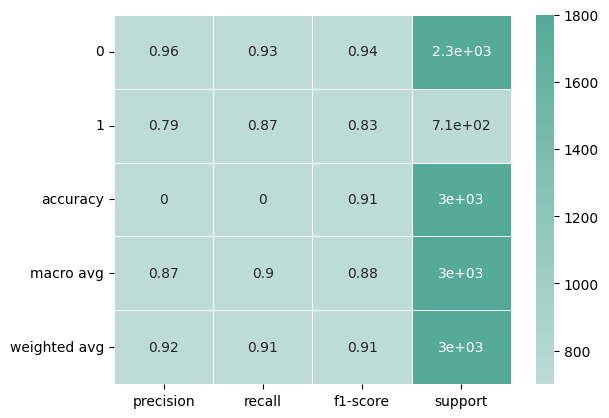

In [1703]:
cl_content = make_cl_report_data(y_test, y_rfc_pred)


In [1704]:
from sklearn.ensemble import GradientBoostingClassifier

In [1705]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=7)
gbc.fit(X_res, y_res)
y_gbc_pred = gbc.predict(X_test)

In [1706]:
cv_gbc_score = cross_val_score(gbc, X_res, y_res, cv=5)
print("{:.3f} accuracy with standard deviation is {:.3f}"
      .format(cv_gbc_score.mean(), cv_gbc_score.std()))

0.974 accuracy with standard deviation is 0.009


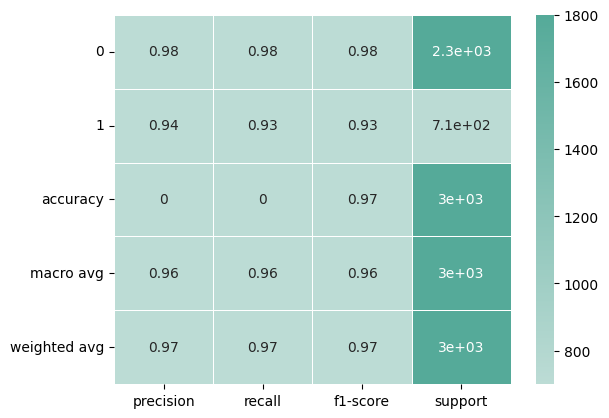

In [1707]:
cl_content = make_cl_report_data(y_test, y_gbc_pred)

6.	Identify the best model and justify the evaluation metrics used. 

6.1.	Find the ROC/AUC for each model and plot the ROC curve.

6.2.	Find the confusion matrix for each of the models.

In [1708]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

# roc_auc_score for each model
# LogisticRegression roc_auc_score
X_true = d_dataset[d_dataset['left'] == 1].drop(['cluster', 'left'], axis=1).values
y_true = d_dataset[d_dataset['left'] == 1]['left'].values
print(X_true.shape, y_true.shape)

(3571, 20) (3571,)


In [1709]:
for i, (train_index, test_index) in enumerate(sss.split(X_true, y_true)) :
    X_train_true = X[train_index]
    y_train_true = y[train_index]
    sm = SMOTE(random_state=123)
    X_res_true, y_res_true = sm.fit_resample(X_train_true, y_train_true)

    print('Resampled Data Shape: %s' % Counter(y_res_true))
    print(X_train_true.shape, y_train_true.shape)
    print(X_res_true.shape, y_res_true.shape)

Resampled Data Shape: Counter({1: 1606, 0: 1606})
(2856, 20) (2856,)
(3212, 20) (3212,)


In [1710]:
log_reg_true = LogisticRegression(random_state=7).fit(X_res_true, y_res_true)
roc_auc_score(y_res_true, log_reg_true.predict_proba(X_res_true)[:, 1])

0.8698168760051426

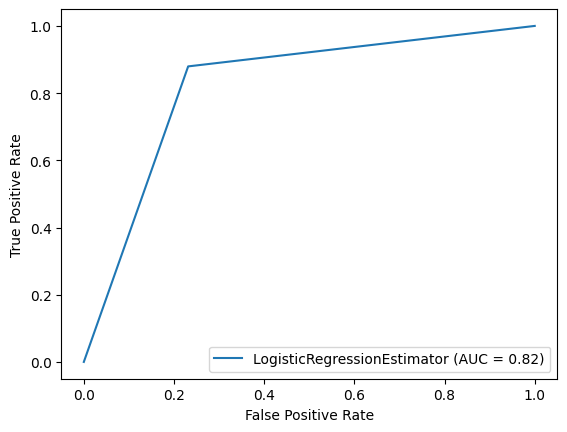

In [1711]:
# LogisticRegression ROC curve
from sklearn import metrics

fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, y_lr_pred)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
display_lr = metrics.RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=roc_auc_lr,
                                    estimator_name='LogisticRegressionEstimator')
display_lr.plot()
plt.show()

In [1712]:
# RandomForest roc_auc_score
rfc_true = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=7, max_depth=3).fit(X_res_true, y_res_true)
roc_auc_score(y_res_true, rfc_true.predict_proba(X_res_true)[:, 1])

0.9709369363641016

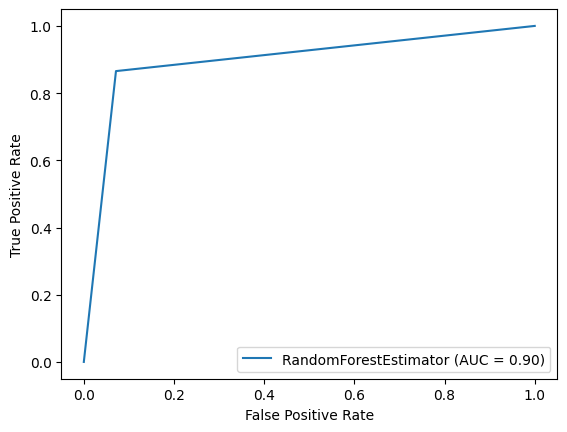

In [1713]:
# RandomForest ROC curve
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, y_rfc_pred)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)
display_rfc = metrics.RocCurveDisplay(fpr=fpr_rfc, tpr=tpr_rfc, roc_auc=roc_auc_rfc,
                                    estimator_name='RandomForestEstimator')
display_rfc.plot()
plt.show()

In [1714]:
# GradientBoostingClassifier roc_auc_score
gbc_true = GradientBoostingClassifier(n_estimators=200, random_state=7).fit(X_res_true, y_res_true)
roc_auc_score(y_res_true, gbc_true.predict_proba(X_res_true)[:, 1])

0.9969413423199739

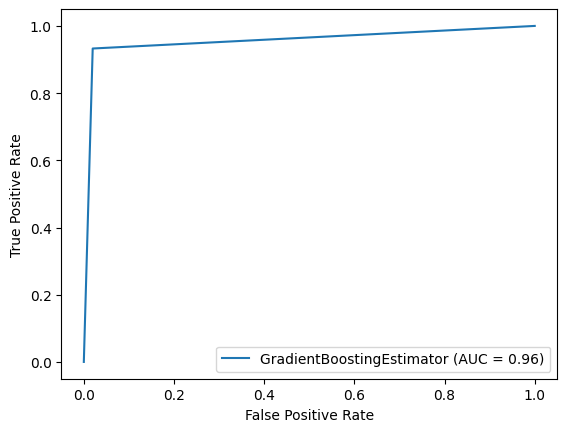

In [1715]:
# GradientBoostingClassifier ROC curve
fpr_gbc, tpr_gbc, threshold_gbc = metrics.roc_curve(y_test, y_gbc_pred)
roc_auc_gbc = metrics.auc(fpr_gbc, tpr_gbc)
display_gbc = metrics.RocCurveDisplay(fpr=fpr_gbc, tpr=tpr_gbc, roc_auc=roc_auc_gbc,
                                    estimator_name='GradientBoostingEstimator')
display_gbc.plot()
plt.show()

6.3.	From the confusion matrix, explain which metric needs to be used- Recall or Precision?

In [1716]:
# confusion matrix for each model
def get_precision_recall(cm) :
    
    TN=cm[0][0]
    TP=cm[1][1]
    FN=cm[1][0]
    FP=cm[0][1]

    precision_val = TP/(TP+FP)
    recall_val = TP/(TP+FN)
    return precision_val, recall_val

# confustion matrix for LogisticRegreesion
cm_lr=confusion_matrix(y_test, y_lr_pred)
print("LogisticRegression:\nconfusion_matrix\n",cm_lr)
pre_lr, recall_lr = get_precision_recall(cm_lr)
print("\nprecision={:.2f}, reall={:.2f}".format(pre_lr, recall_lr))

LogisticRegression:
confusion_matrix
 [[1757  529]
 [  86  628]]

precision=0.54, reall=0.88


In [1717]:
# confustion matrix for RandomForest
cm_rfc=confusion_matrix(y_test, y_rfc_pred)
print("RandomForest:\nconfusion_matrix\n",cm_rfc)
pre_rfc, recall_rfc = get_precision_recall(cm_rfc)
print("\nprecision={:.2f}, reall={:.2f}".format(pre_rfc, recall_rfc))

RandomForest:
confusion_matrix
 [[2123  163]
 [  96  618]]

precision=0.79, reall=0.87


In [1718]:
# confustion matrix for GradientBoosting
cm_gbc=confusion_matrix(y_test, y_gbc_pred)
print("GradientBoosting:\nconfusion_matrix\n",cm_gbc)
pre_gbc, recall_gbc = get_precision_recall(cm_gbc)
print("\nprecision={:.2f}, reall={:.2f}".format(pre_gbc, recall_gbc))

GradientBoosting:
confusion_matrix
 [[2241   45]
 [  48  666]]

precision=0.94, reall=0.93


From the comfusion matrix, GradientBoosting has highest precision and recall.
Precision is how well the model classify the positive values as high as possible.
Recall is how many times the model classify positive values accurate. So precision can be used.

7.	Suggest various retention strategies for targeted employees.
7.1.	Using the best model, predict the probability of employee turnover in the test data.

In [1719]:
gbc = GradientBoostingClassifier(n_estimators=200, random_state=7)
gbc.fit(X_res, y_res)
y_gbc_pred = gbc.predict(X_test)

In [1720]:
from sklearn.metrics import log_loss
log_loss(y_test, gbc.predict_proba(X_test))

0.10262765923615758

In [1721]:
y_gbc_proba = gbc.predict_proba(X_test)[:, 1]
print("Probability mean of employees to left the company : {:.2f}".format(y_gbc_proba.mean()))
print("Probability standard deviation of employees to left the company : {:.2f}".format(y_gbc_proba.std()))

Probability mean of employees to left the company : 0.26
Probability standard deviation of employees to left the company : 0.39


7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

■	Safe Zone (Green) (Score < 20%)

■	Low Risk Zone (Yellow) (20% < Score < 60%)

■	Medium Risk Zone (Orange) (60% < Score < 90%)

■	High Risk Zone (Red) (Score > 90%).


In [1722]:
X = d_dataset.drop(['cluster', 'left'], axis=1).values
proba = gbc.predict_proba(X)[:, 1]
proba

array([0.99138982, 0.95314708, 0.99585569, ..., 0.98625798, 0.99595632,
       0.98625798])

In [1723]:
d_dataset['Proba'] = proba

In [1724]:
d_dataset['Proba']

0        0.991390
1        0.953147
2        0.995856
3        0.886246
4        0.990870
           ...   
14994    0.986258
14995    0.985433
14996    0.986258
14997    0.995956
14998    0.986258
Name: Proba, Length: 14999, dtype: float64

In [1725]:
d_dataset['Zone'] = ' '
for i in d_dataset.index :
    if d_dataset.loc[i, "Proba"] < 0.2 :
        d_dataset.loc[i, "Zone"] = 'Safe Zone'
    elif (d_dataset.loc[i, "Proba"] >= 0.2) & (d_dataset.loc[i, "Proba"] < 0.6) :
        d_dataset.loc[i, "Zone"] = 'Low Risk Zone'
    elif (d_dataset.loc[i, "Proba"] >= 0.6) & (d_dataset.loc[i, "Proba"] < 0.9) :
        d_dataset.loc[i, "Zone"] = 'Medium Risk Zone'
    else :
        d_dataset.loc[i, "Zone"] = 'High Risk Zone'

In [1726]:
d_dataset.Zone.value_counts()

Zone
Safe Zone           10901
High Risk Zone       3132
Low Risk Zone         651
Medium Risk Zone      315
Name: count, dtype: int64

In [1727]:
d_dataset[['Proba', 'Zone']].head()

,Proba,Zone
0,0.991390,High Risk Zone
1,0.953147,High Risk Zone
2,0.995856,High Risk Zone
3,0.886246,Medium Risk Zone
4,0.990870,High Risk Zone


In [1728]:
d_dataset[['Proba', 'Zone']][d_dataset['Zone'] == 'Medium Risk Zone'].head()

,Proba,Zone
3,0.886246,Medium Risk Zone
67,0.875669,Medium Risk Zone
68,0.665823,Medium Risk Zone
105,0.780553,Medium Risk Zone
135,0.893624,Medium Risk Zone


In [1729]:
d_dataset[['Proba', 'Zone']][d_dataset['Zone'] == 'Safe Zone'].head()

,Proba,Zone
45,0.066796,Safe Zone
50,0.116336,Safe Zone
65,0.144459,Safe Zone
82,0.095399,Safe Zone
108,0.049350,Safe Zone


In [1730]:
d_dataset[['Proba', 'Zone']][d_dataset['Zone'] == 'Low Risk Zone'].head()

,Proba,Zone
47,0.296910,Low Risk Zone
70,0.310095,Low Risk Zone
86,0.283351,Low Risk Zone
120,0.289541,Low Risk Zone
127,0.455409,Low Risk Zone


In [1731]:
#d_dataset.drop('Proba', inplace=True, axis=1)

In [1732]:
d_dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,cluster,dummies_IT,...,dummies_marketing,dummies_product_mng,dummies_sales,dummies_support,dummies_technical,dummies_high,dummies_low,dummies_medium,Proba,Zone
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.991390,High Risk Zone
1,0.80,0.86,5,262,5,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0.953147,High Risk Zone
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0.995856,High Risk Zone
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.886246,Medium Risk Zone
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0.990870,High Risk Zone


In [1733]:
# The employee who stay
# Most people is in Safe Zone
d_dataset[d_dataset['left'] == 0]['Zone'].value_counts()

Zone
Safe Zone           10765
Low Risk Zone         541
Medium Risk Zone      100
High Risk Zone         22
Name: count, dtype: int64

In [1734]:
# The employee who left
# Most people is in High Risk Zone, others are errors for the model
d_dataset[d_dataset['left'] == 1]['Zone'].value_counts()

Zone
High Risk Zone      3110
Medium Risk Zone     215
Safe Zone            136
Low Risk Zone        110
Name: count, dtype: int64

Correlation of variables with 'left' examined before

left                     1.000000
time_spend_company       0.363662
average_montly_hours     0.053215
number_project           0.012697
last_evaluation         -0.026146
promotion_last_5years   -0.051478
numeric_salary          -0.145250
Work_accident           -0.154103
satisfaction_level      -0.444273
Name: left, dtype: float64

In [1735]:
zone_stats=[] # store describe statistics
zone_name =['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone',  'High Risk Zone']
examin_col = ['time_spend_company', 'average_montly_hours', 'last_evaluation', 'satisfaction_level']

d_dataset[examin_col][(d_dataset['left'] == 0)&(d_dataset['Zone'] == 'High Risk Zone')].describe()
for i in range(len(zone_name)) :
    zone_stats.append(d_dataset[examin_col][(d_dataset['left'] == 0)&(d_dataset['Zone'] == zone_name[i])].describe())

zone_desc = dict(zip(zone_name, zone_stats))
    

In [1736]:
employee_desc = []
evaluation_desc = pd.DataFrame()
for col in examin_col :
    for key in zone_desc.keys() :
        temp = pd.DataFrame(zone_desc[key][col])
        temp.rename({col:key}, axis=1, inplace=True)
        evaluation_desc = pd.concat([evaluation_desc, 
                                     temp], 
                                    axis=1)
    employee_desc.append(evaluation_desc)
    evaluation_desc = pd.DataFrame()

In [1737]:
temp = pd.DataFrame(zone_desc['Safe Zone']['time_spend_company'])
temp.rename({'time_spend_company':'Safe Zone'}, axis=1, inplace=True)
temp

,Safe Zone
count,10765.000000
mean,3.103484
std,0.970425
min,2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [1738]:
print(examin_col[0])
employee_desc[0]

time_spend_company


,Safe Zone,Low Risk Zone,Medium Risk Zone,High Risk Zone
count,10765.000000,541.000000,100.000000,22.000000
mean,3.103484,4.170055,4.250000,4.363636
std,0.970425,0.867473,0.988571,0.902138
min,2.000000,2.000000,2.000000,3.000000
25%,2.000000,4.000000,3.000000,3.250000
50%,3.000000,4.000000,5.000000,5.000000
75%,4.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000


time_spend_company


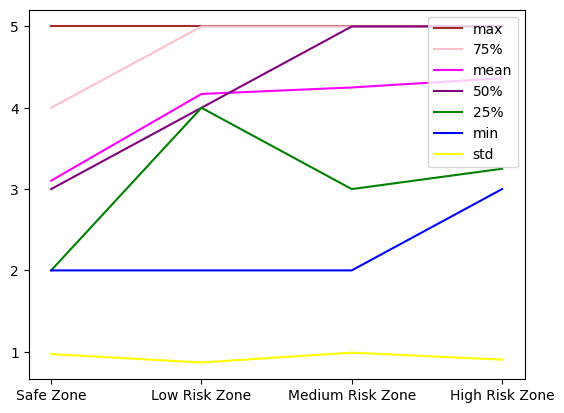

<Figure size 600x600 with 0 Axes>

In [1739]:
from matplotlib.legend import Legend

print(examin_col[0])
fig, ax = plt.subplots()
lines = []
temp1=employee_desc[0]
temp2=employee_desc[0].T
plt.figure(figsize=(6,6))
lines += ax.plot(zone_name, temp2['max'], color='brown')
lines += ax.plot(zone_name, temp2['75%'], color='pink')
lines += ax.plot(zone_name, temp2['mean'], color='magenta')
lines += ax.plot(zone_name, temp2['50%'], color='purple')
lines += ax.plot(zone_name, temp2['25%'], color='green')
lines += ax.plot(zone_name, temp2['min'], color='blue')
lines += ax.plot(zone_name, temp2['std'], color='yellow')

ax.axis='equal'
ax.legend(lines,
           ['max', '75%', 'mean', '50%', '25%', 'min', 'std'], 
           loc='upper right')

plt.show()


The employee in High and Low Risk Zone spend time for work more than other zones.

average_montly_hours


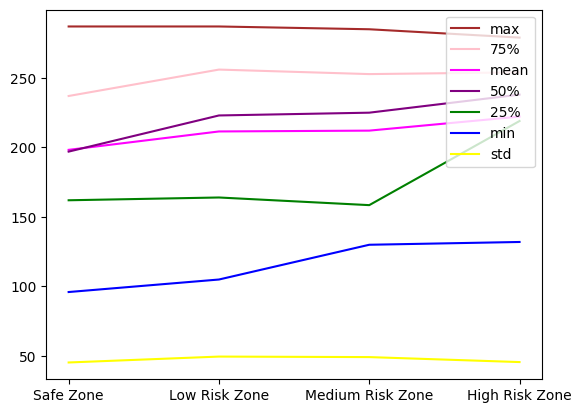

<Figure size 600x600 with 0 Axes>

In [1740]:
from matplotlib.legend import Legend

print(examin_col[1])
fig, ax = plt.subplots()
lines = []
temp1=employee_desc[1]
temp2=employee_desc[1].T
plt.figure(figsize=(6,6))
lines += ax.plot(zone_name, temp2['max'], color='brown')
lines += ax.plot(zone_name, temp2['75%'], color='pink')
lines += ax.plot(zone_name, temp2['mean'], color='magenta')
lines += ax.plot(zone_name, temp2['50%'], color='purple')
lines += ax.plot(zone_name, temp2['25%'], color='green')
lines += ax.plot(zone_name, temp2['min'], color='blue')
lines += ax.plot(zone_name, temp2['std'], color='yellow')

ax.axis='equal'
ax.legend(lines,
           ['max', '75%', 'mean', '50%', '25%', 'min', 'std'], 
           loc='upper right')

plt.show()

For average monthly hours at work of below 25% number of people in High Risk Zone is high as 200 hours which is about 25% more than the people in Save Zone. Min average_montly_hours are very high in Low, Medium and High Risk Zone

last_evaluation


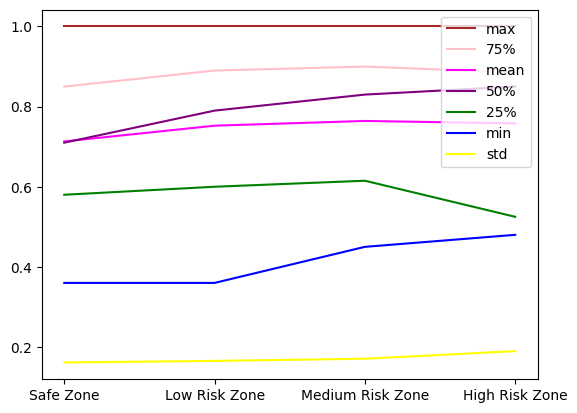

<Figure size 600x600 with 0 Axes>

In [1741]:
from matplotlib.legend import Legend

print(examin_col[2])
fig, ax = plt.subplots()
lines = []
temp1=employee_desc[2]
temp2=employee_desc[2].T
plt.figure(figsize=(6,6))
lines += ax.plot(zone_name, temp2['max'], color='brown')
lines += ax.plot(zone_name, temp2['75%'], color='pink')
lines += ax.plot(zone_name, temp2['mean'], color='magenta')
lines += ax.plot(zone_name, temp2['50%'], color='purple')
lines += ax.plot(zone_name, temp2['25%'], color='green')
lines += ax.plot(zone_name, temp2['min'], color='blue')
lines += ax.plot(zone_name, temp2['std'], color='yellow')

ax.axis='equal'
ax.legend(lines,
           ['max', '75%', 'mean', '50%', '25%', 'min', 'std'], 
           loc='upper right')

plt.show()

Below 25% of people in High Risk Zone evaluated lower than other Zone. Evaluation about work or environment is not very low. But minumum evauation value in Safe and Low Risk Zone is low.

satisfaction_level


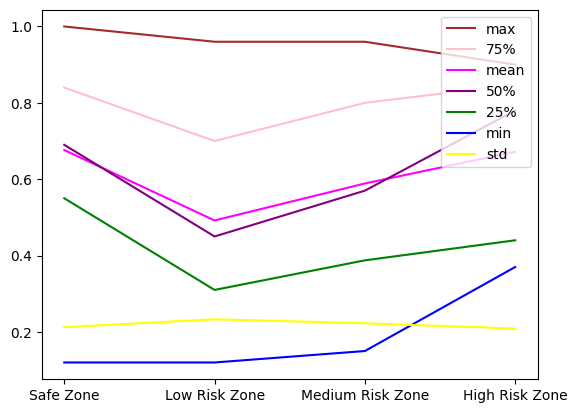

<Figure size 600x600 with 0 Axes>

In [1742]:
from matplotlib.legend import Legend

print(examin_col[3])
fig, ax = plt.subplots()
lines = []
temp1=employee_desc[3]
temp2=employee_desc[3].T
plt.figure(figsize=(6,6))
lines += ax.plot(zone_name, temp2['max'], color='brown')
lines += ax.plot(zone_name, temp2['75%'], color='pink')
lines += ax.plot(zone_name, temp2['mean'], color='magenta')
lines += ax.plot(zone_name, temp2['50%'], color='purple')
lines += ax.plot(zone_name, temp2['25%'], color='green')
lines += ax.plot(zone_name, temp2['min'], color='blue')
lines += ax.plot(zone_name, temp2['std'], color='yellow')

ax.axis='equal'
ax.legend(lines,
           ['max', '75%', 'mean', '50%', '25%', 'min', 'std'], 
           loc='upper right')

plt.show()

satisfaction level in Low Risk Zone is the lowest. Midium Risk Zone is the second lowest.

In conclusion, For the Medium and High Risk Zone, Decresing time spend in company, and average monthly hours is suggested. For the Safe, Low, and Medium Risk Zone, last_evaluation factors need to be increased.
For the Low and Medium Risk Zone, satisfaction level is required to be improved.

Done By Sun Young Kim